In [1]:
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import os
from os.path import abspath

import matplotlib.pyplot as plt
%matplotlib inline

import subtle.subtle_preprocess as sup
import subtle.subtle_plot as suplot
import subtle.subtle_io as suio

import SimpleITK as sitk

/home/jon/anaconda/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
base_path = '/home/subtle/Data/Tiantan/NO47'
recon_path = '/raid/jon/predictions/Tiantan_model_b99220_fa31da_epoch100_2019_06_19/NO47/'

path_zero, path_low, path_high = suio.get_dicom_dirs(base_path, override=True)
print(path_zero, path_low, path_high)

/home/subtle/Data/Tiantan/NO47/3DT1WMPRAGE_SAG_CS4_301 /home/subtle/Data/Tiantan/NO47/3DT1WMPRAGE_SAG_CS4_701 /home/subtle/Data/Tiantan/NO47/3DT1WMPRAGE_SAG_CS4_801


In [3]:
im0, hd0 = suio.dicom_files(path_zero, normalize=False)
im1, hd1 = suio.dicom_files(path_low, normalize=False)
im2, hd2 = suio.dicom_files(path_high, normalize=False)
imr, hdr = suio.dicom_files(recon_path, normalize=False)
print(im0.shape, im1.shape, im2.shape, imr.shape)

(165, 240, 240) (165, 240, 240) (165, 240, 240) (165, 240, 240)


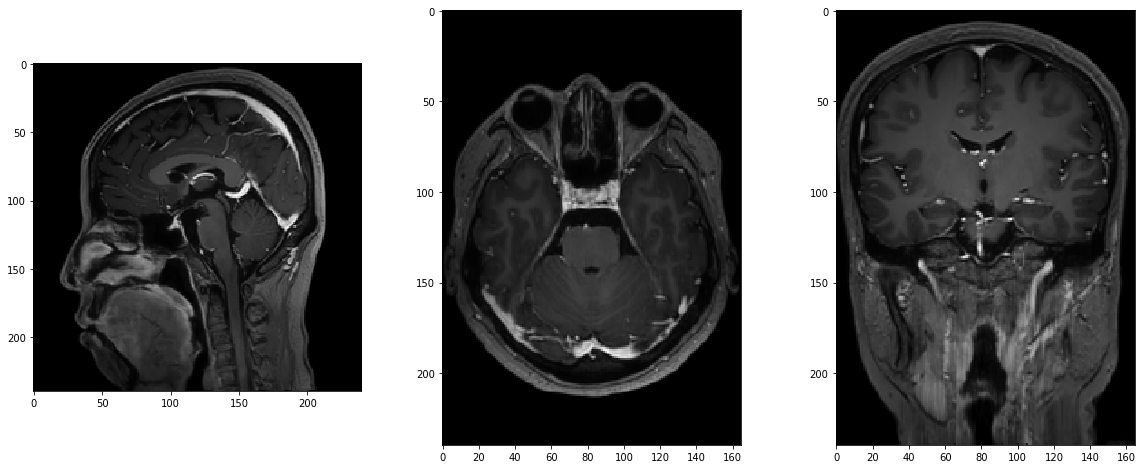

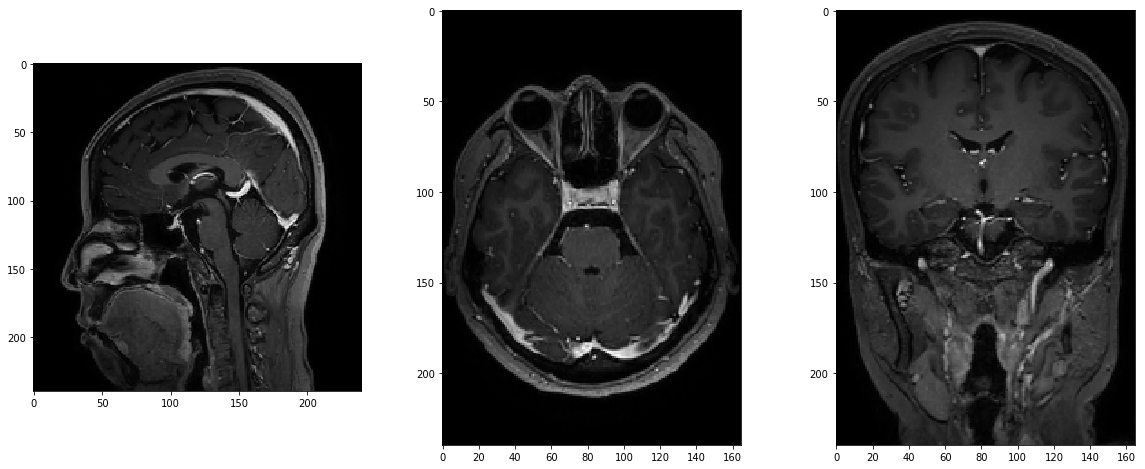

In [4]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.imshow(abs(imr[imr.shape[0]//2,...]), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(abs(imr[:,imr.shape[1]//2,...]).T, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(abs(imr[...,imr.shape[2]//2]).T, cmap='gray')

plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.imshow(abs(im2[im2.shape[0]//2,...]), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(abs(im2[:,im2.shape[1]//2,...]).T, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(abs(im2[...,im2.shape[2]//2]).T, cmap='gray')

### check simple mean



In [5]:
def running_mean(x, N):
    c = np.cumsum(np.insert(x, 0, 0, axis=-1), axis=-1) 
    return (c[...,N:] - c[...,:-N]) / float(N)

(165, 240, 240) (161, 240, 240)


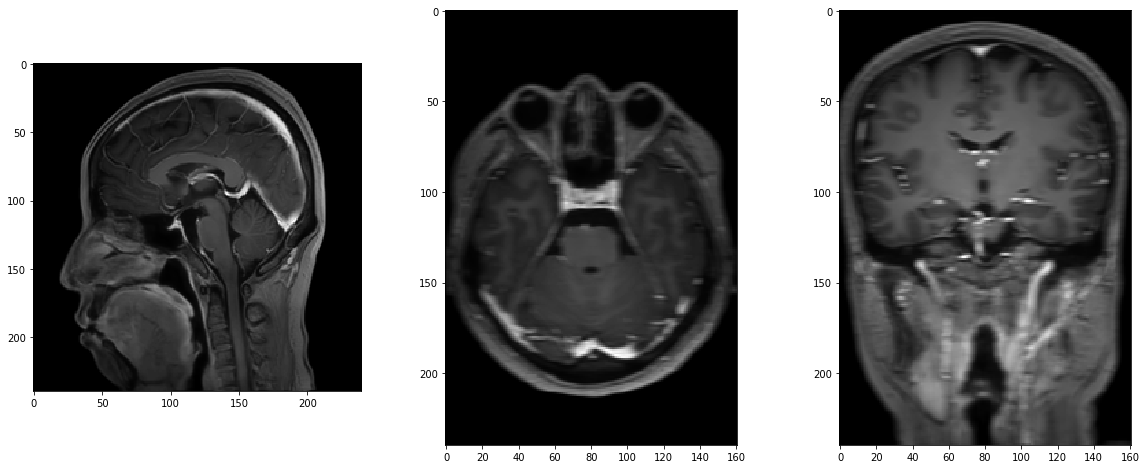

In [6]:
NA = 5
imr_ma = running_mean(imr.transpose((1,2,0)), NA).transpose((2, 0, 1))
print(imr.shape, imr_ma.shape)

plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.imshow(abs(imr_ma[imr_ma.shape[0]//2,...]), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(abs(imr_ma[:,imr_ma.shape[1]//2,...]).T, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(abs(imr_ma[...,imr_ma.shape[2]//2]).T, cmap='gray')

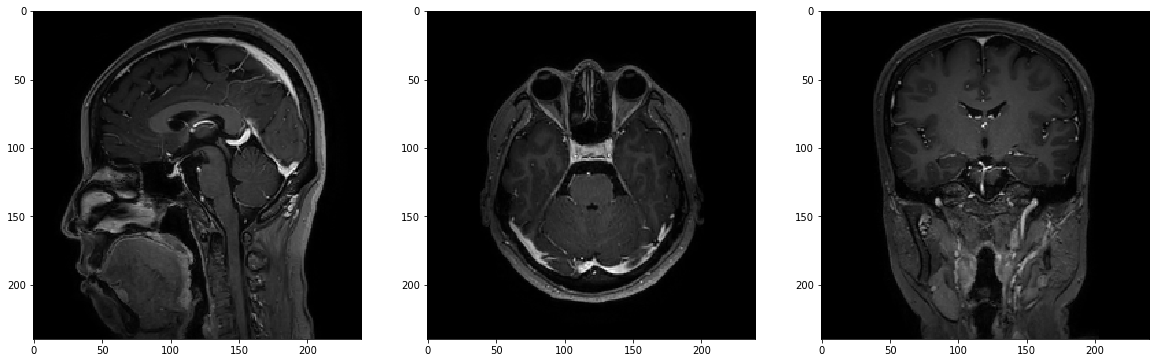

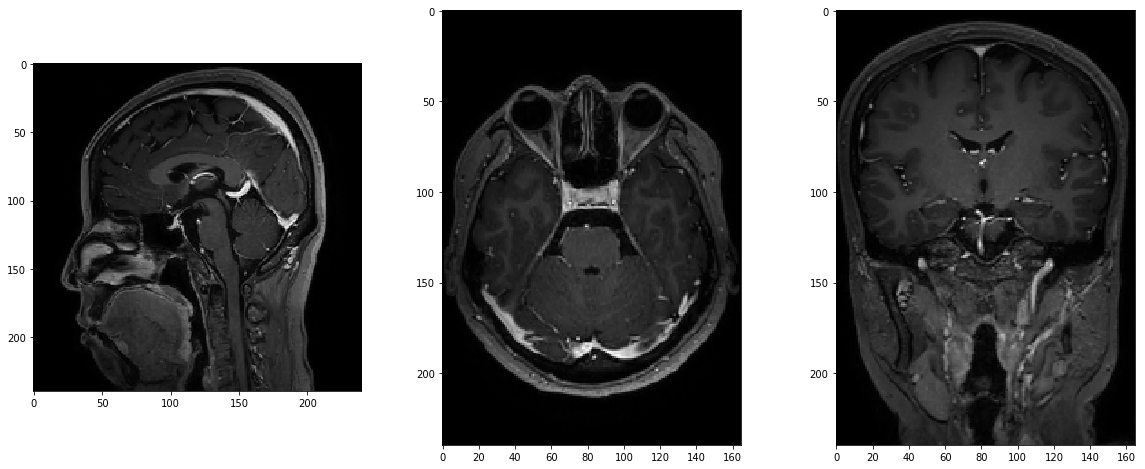

In [7]:
import sigpy as sp

im2r = sp.util.resize(im2, [240, 240, 240])
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.imshow(abs(im2r[im2r.shape[0]//2,...]), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(abs(im2r[:,im2r.shape[1]//2,...]).T, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(abs(im2r[...,im2r.shape[2]//2]).T, cmap='gray')

im2r2 = sp.util.resize(im2r, [165, 240, 240])
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.imshow(abs(im2r2[im2r2.shape[0]//2,...]), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(abs(im2r2[:,im2r2.shape[1]//2,...]).T, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(abs(im2r2[...,im2r2.shape[2]//2]).T, cmap='gray')

In [8]:
x0, hd0 = suio.dicom_files('/raid/jon/predictions/Tiantan_model_b99220_fa31da_epoch50_resize2_20190619/NO47', normalize=False)
x1, hd1 = suio.dicom_files('/raid/jon/predictions/Tiantan_model_b99220_fa31da_epoch50_resize_20190619/NO47', normalize=False)
x2, hd2 = suio.dicom_files('/raid/jon/predictions/Tiantan_model_1ea474_e291ec_epoch100_2019_06_19/NO47', normalize=False)


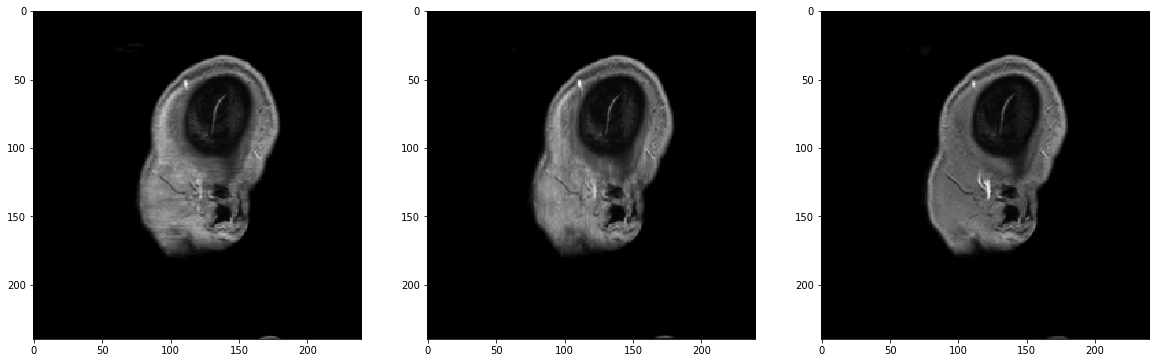

In [9]:
idx = x0.shape[0] // 2
idx = 10
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.imshow(abs(x0[idx,...]), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(abs(x1[idx,...]), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(abs(x2[idx,...]), cmap='gray')


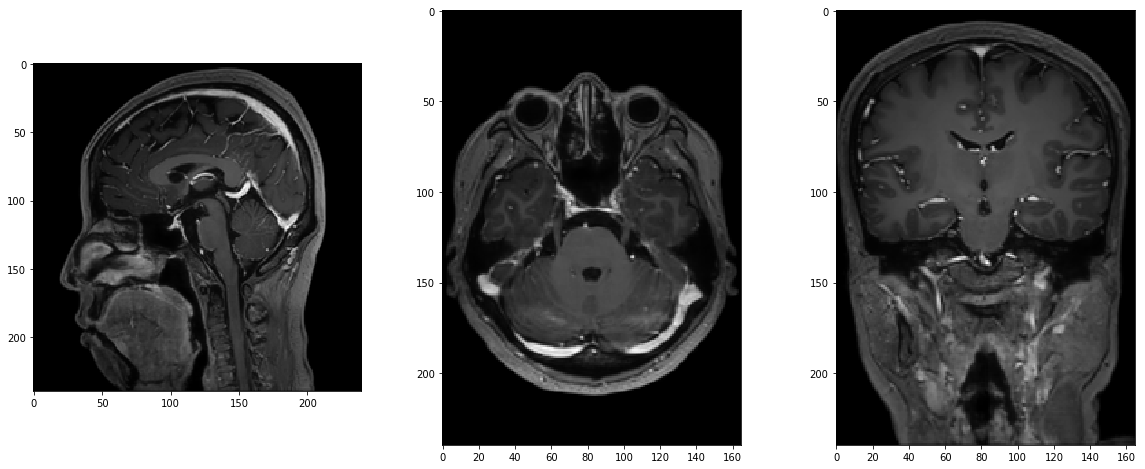

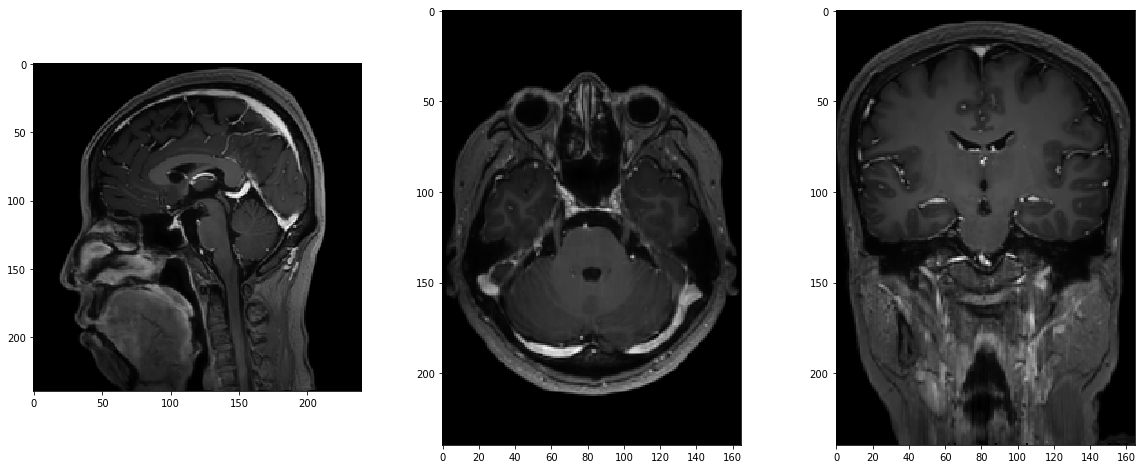

In [10]:
xx = (x0 + x1 + x2) / 3.
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.imshow(abs(xx[82,...]), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(abs(xx[:,124,...]).T, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(abs(xx[...,123]).T, cmap='gray')


plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.imshow(abs(imr[82,...]), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(abs(imr[:,124,...]).T, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(abs(imr[...,123]).T, cmap='gray')

(165, 240, 240)


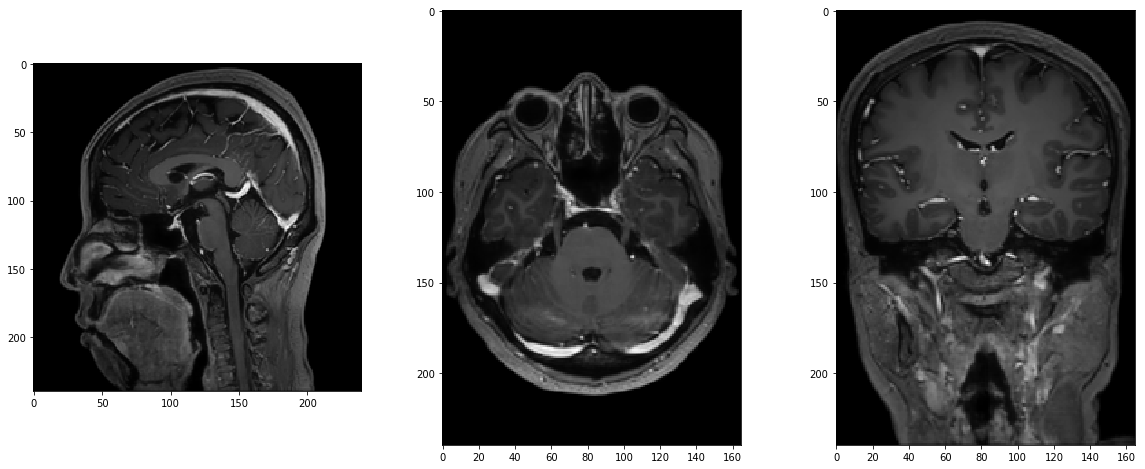

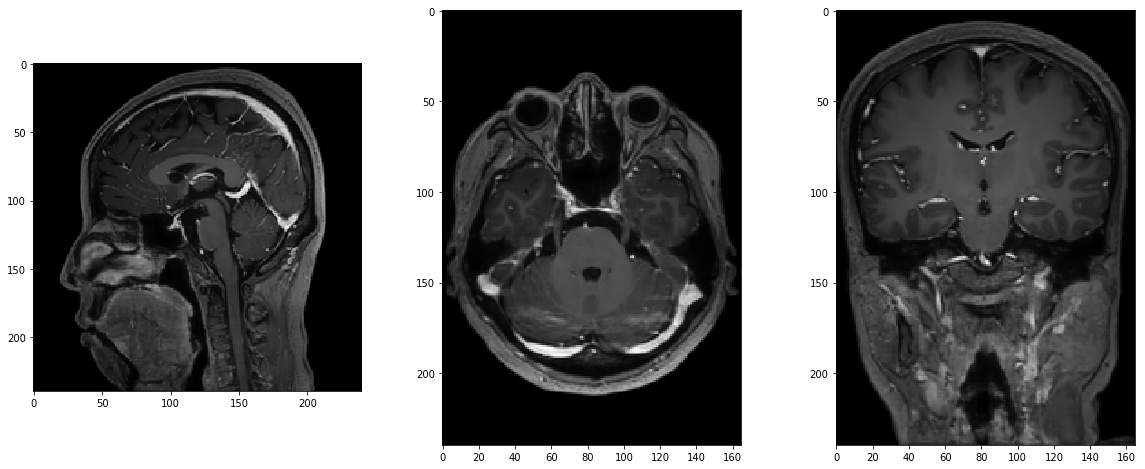

In [14]:
from scipy.ndimage import gaussian_filter

plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.imshow(abs(xx[82,...]), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(abs(xx[:,124,...]).T, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(abs(xx[...,123]).T, cmap='gray')

xx2 = np.median(np.stack((x0, x1, x2), axis=2), axis=2, keepdims=False)
print(xx2.shape)
# xx2 = gaussian_filter(xx, sigma=.1)
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.imshow(abs(xx2[82,...]), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(abs(xx2[:,124,...]).T, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(abs(xx2[...,123]).T, cmap='gray')


In [15]:
zz = np.load('../testme.npy')
zz2 = np.load('../testme2.npy')
zz3 = np.load('../testme3.npy')
print(zz.shape)
print(zz2.shape)
print(zz3.shape)
plt.imshow(np.squeeze(zz[210,...]))
plt.figure()
plt.imshow(np.squeeze(zz2[210,...]))
plt.figure()
plt.imshow(np.squeeze(zz3[100,...]))



FileNotFoundError: [Errno 2] No such file or directory: '../testme.npy'

In [ ]:
import subtle.subtle_generator as sugen
data_file = '/raid/jon/data_full_tiantan/data/NO7.h5'
G = sugen.DataGenerator([data_file], batch_size=1, slices_per_input=5, shuffle=False, verbose=1, residual_mode=False, positive_only=False, predict=False, resize=240, slice_axis=3)


240
[218 219 220 221 222]
(196, 3, 240, 5)
(5, 3, 196, 240)
(5, 3, 240, 240)
(1, 240, 240, 10) (1, 240, 240, 1)
240
[228 229 230 231 232]
(196, 3, 240, 5)
(5, 3, 196, 240)
(5, 3, 240, 240)
(1, 240, 240, 10) (1, 240, 240, 1)
240
[237 238 239]
(196, 3, 240, 5)
(5, 3, 196, 240)
(5, 3, 240, 240)
(1, 240, 240, 10) (1, 240, 240, 1)


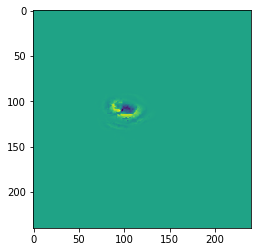

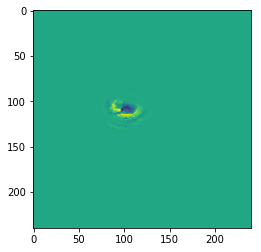

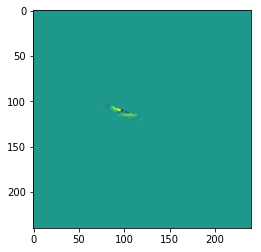

In [57]:
x0 = G[220]
print(x0[0].shape, x0[1].shape)

plt.figure()
plt.imshow(x0[1][0,...,0].squeeze())

x0 = G[230]
print(x0[0].shape, x0[1].shape)

plt.figure()
plt.imshow(x0[1][0,...,0].squeeze())

x0 = G[239]
print(x0[0].shape, x0[1].shape)

plt.figure()
plt.imshow(x0[1][0,...,0].squeeze())

{'/raid/jon/data_full_tiantan/data/NO7.h5': 240}
240
[218 219 220 221 222]
(196, 3, 240, 5)
(5, 3, 196, 240)
(5, 3, 240, 240)
(196, 3, 240, 5) (5, 3, 196, 240) (5, 3, 240, 240)


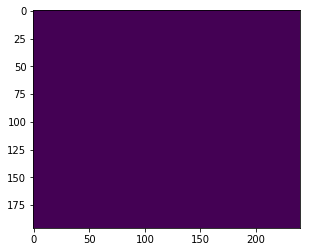

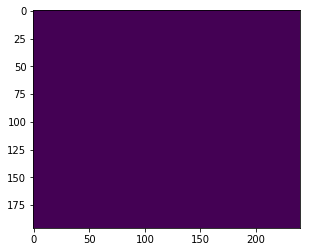

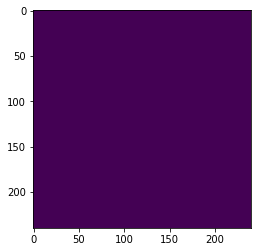

In [61]:
print(G.slices_per_file_dict)
xx = G[220]
x0 = np.load('x0.npy')
x1 = np.load('x1.npy')
x2 = np.load('x2.npy')
print(x0.shape, x1.shape, x2.shape)

plt.figure()
plt.imshow(x0[:,0,:,0])

plt.figure()
plt.imshow(x1[0,0,:,:])

plt.figure()
plt.imshow(x2[0,0,:,:])

240
240
(196, 3, 240, 240)
(240, 3, 240, 240)


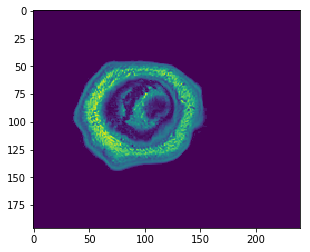

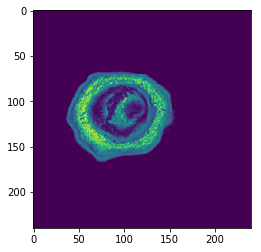

In [67]:
print(G.num_slices)
print(len(G))
zz0 = suio.load_file(data_file)
print(zz0.shape)
plt.figure()
plt.imshow(np.squeeze(zz0[:,0,:,200]))


zz1 = sp.util.resize(zz0, [240, 3, 240, 240])
print(zz1.shape)

plt.figure()
plt.imshow(np.squeeze(zz1[:,0,:,200]))